# Numpy Basics - Arrays and Vectorized Computation
numpy, short for Numerical Python, is an important foundational package for numerical computing. Most computational packages providing scientific functionality use NumpPy's array objects as *lingua franca* for data exchange. you'll find:
* ndarray - an efficient multidemianional array providing fast array-oriented artihmetic operations and flexible *broadcasting* capabilities
* mathematical functions for fast operations on entire arrays of dta without looping
* tools for reading/writing array data to disk, and working with memory-mapped files
* linearl algebra, RNG, and fourier transforms
* A C API for connecting NumPy with libraries written in C, C++, or FORTRAN

for data analysis, the main NumPy functionality involves:
* Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformations, and any other kinds of computation
* Common array algoritms like sorting, unique, and set operations
* Efficient descriptive statistics and aggregating/summarizing data
* Data alignment and relational data manipulation for mergin and joinng together heterogeneous datasets
* Expressing conditional logic as array expressions instead of loops
* group-wise data manipulations (aggregations, transformation, function application)

one of the reasons why NumPy is so important for numerical conputation is because it is designed for efficiency on large arrays of data:
* NumPy internally stores data in a contiguous block of memory, independant of other built-in python objects. NumPy's library of algorithms written in teh C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in python sequences
* NumPy operations perform complex computations on entire arrays without the need for looping

speed comparison

In [1]:
import numpy as np

## numpy array vs list performance

In [2]:
nElements = 1000000
my_arr = np.arange(nElements)
my_list = list(range(nElements))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 17.8 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 665 ms


numpy arrays are generally 10 to 100 times faster (or more) than pure python, and use significantly less memory

## The NumPy ndarray: a Multidimensional object
ndarrays allow you to perform mathematical operations on whole blocks of data, using similar syntax to the operations between scalar objects.

In [5]:
#generate some random data
data = np.random.randn(2, 3)

In [6]:
data

array([[-1.7960466 , -1.15881259,  0.06573119],
       [-1.18181815,  2.4430217 ,  0.06495519]])

In [7]:
#multiply every element by 10
data * 10

array([[-17.96046595, -11.58812591,   0.65731193],
       [-11.81818154,  24.43021696,   0.64955187]])

In [8]:
#add data with itsef
data + data

array([[-3.59209319, -2.31762518,  0.13146239],
       [-2.36363631,  4.88604339,  0.12991037]])

an ndarray is a generic multidimensional container for homogeneous data. every array has a *shape*, which is a tuple indicating the size of each dimension, and a *dtype* an object describing the **datatype** of the array.

In [9]:
#numpy is row major
#first dimension - number of rows
#second dimension - number of columns
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

## creating ndarrays

In [11]:
#numpy accepts any sequence-like object (including other arrays)
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)

In [12]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [13]:
#nested sequences will be converted into a multi-dimensional array
#note how we define by rows
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)

In [14]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [15]:
#arr2 has two dimensions, inferred from the data
arr2.ndim

2

In [16]:
arr2.shape

(2, 4)

In [17]:
#unless explicitly specified, np.array tries to infer a good data type for the type of value it tries to store
#this is stored in a dtype metadata object
arr2.dtype

dtype('int32')

there are a number of functions for creating new arrays. specialized functions such as *zeros* and *ones*

In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

*empty* which creates an array with no initialized values

In [20]:
np.empty((2, 3, 2))

array([[[1.01855798e-312, 1.03977794e-312],
        [1.01855798e-312, 9.54898106e-313],
        [1.08221785e-312, 1.01855798e-312]],

       [[1.23075756e-312, 1.14587773e-312],
        [1.10343781e-312, 9.76118064e-313],
        [1.08221785e-312, 1.90979621e-312]]])

**NOTE:** empty **does not initialize values** this means that the values in the array are whatever garbage data was left over before. a more correct use (i think) is as such

In [21]:
#no rows and ten columns
np.empty((0, 10))

array([], shape=(0, 10), dtype=float64)

arange is an array-valued version of the built-in python range function

In [22]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### datatypes for ndarrays
each array has a *dtype* contaiing metadata that the array needs to interpret a chunk of memory. dtypes are a source of flexibility for interacting with data coming from other systems. they provide a mapping directly to an underlying disk, or memory representation. you can cast arrays from one type to another

In [23]:
arr = np.array([1, 2, 3, 4, 5])

In [24]:
arr.dtype

dtype('int32')

In [25]:
float_arr = arr.astype(np.float64)

In [26]:
float_arr.dtype

dtype('float64')

you can convert string representations of numbers to their actual type, be careful with this though

In [27]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [28]:
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [29]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

## Arithmetic with NumPy arrays
arrays allow you do express batch operations on data without writing any for loops. numpy calls this *vectorization*. any arithmentic operations between equal-size arrays applies the operation element-wise

In [30]:
arr = np.array([[1., 2., 3.], [4., 5. , 6.]])

In [31]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [32]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [33]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

arithmetic oeprations with scalars propagate the scalar argument to each element in the array (this is a part of the *broadcasting* functionality. the scalar is broadcasted to each element in the array)

In [34]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [35]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

### boolean arrays
comparisons between arrays yield boolean arrays

In [36]:
arr2 = np.array([[0., 3., 1.], [7., 2., 12.]])

In [37]:
arr2

array([[ 0.,  3.,  1.],
       [ 7.,  2., 12.]])

In [38]:
arr2 >= arr

array([[False,  True, False],
       [ True, False,  True]])

In [39]:
#works with scalars, or other broadcastable arrays as well
arr2 > 5

array([[False, False, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

One-dimensional array slicing behaves similariy to python lists

In [40]:
arr = np.arange(10)

In [41]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
arr[5]

5

In [43]:
arr[5:8]

array([5, 6, 7])

In [44]:
#you can assign to multiple elements
arr[5:8] = 12

In [45]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

an important distinction on *np.arrays* is that NumPy slices are **views on the data**. meaning that <u>the data is not copied, and modifications on teh view will be reflected to teh source array</u>. use the *copy* method to get a copy instead of a view.

In [46]:
#create a view on np array
arr_slice = arr[5:8]

In [47]:
arr_slice

array([12, 12, 12])

In [48]:
#when you change the values in arr_slice, the mutations are reflected in the original array
arr_slice[1] = 12345

In [49]:
arr_slice

array([   12, 12345,    12])

In [50]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [51]:
#if you want a copy of a slice instead of a view, you will explicitly use the copy method
arr_copy = arr[5:8].copy()

In [52]:
arr_copy

array([   12, 12345,    12])

In [53]:
arr_copy[1] = 12

In [54]:
arr_copy

array([12, 12, 12])

In [55]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

### higher dimensional slicing
you may want more options for higher dimensional slicing. for a 2d array, the elements at each index are no longer scalars, **but rather 1d arrays**

In [56]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [57]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [58]:
#get the third (last) row of the array
arr2d[2]

array([7, 8, 9])

individual elements can either be access recursively, or through a comma separated list of indices

In [59]:
arr2d[0][2]

3

In [60]:
#equivalent operation
arr2d[0, 2]

3

it's helpful to think of axis 0 as the "rows" and axis 1 as the "columns".

omiting an index returns an array of a lower dimensional ndarray.

In [61]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [62]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [63]:
#arr3d 0 is a 2x3 array, representing the "first channel"
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
#both scalar values and arrays can be assigned to arr3d[0]
old_values = arr3d[0].copy()
arr3d[0] = 42

In [65]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [66]:
arr3d[0] = old_values

In [67]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [68]:
#arr[1, 0] gives you all the values who's indices start with (1, 0)
#channel 1 (second, row)
arr3d[1, 0]

array([7, 8, 9])

In [69]:
x = arr3d[1]
x[0]

array([7, 8, 9])

### Indexing with slices
like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax
NOTE: numpy, like python in genral, uses exclusive slicing (it doesn't including the end slice point)

In [70]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [71]:
#grab the second element up to the sixth
arr[1:6]

array([ 1,  2,  3,  4, 12])

Slicing multidimensional arrays are different

In [72]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [73]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

when indexing with integers, you always get the same number of dimensiona, bu mixing integer indexes and slices, you get lower dimensional slices

In [74]:
arr2d[1, :2]

array([4, 5])

a colon by itself will take the entire axis

In [75]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

### Boolean Indexing

In [76]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [77]:
data

array([[ 0.50406155, -0.5802423 ,  0.51453026,  0.92466579],
       [-0.47101887,  0.2575551 ,  1.19866987,  1.1542195 ],
       [-1.25738651, -1.11071397,  0.92277897, -0.17149642],
       [-0.05231256,  0.77514933, -1.05643194,  1.16470459],
       [-0.48183648,  0.46741938,  0.48323722,  0.07547411],
       [ 1.07534373, -0.53638961,  1.09929428,  0.36834407],
       [-0.04525942, -0.4539199 , -0.55992848, -0.82479969]])

comparison operations on ndarrays yield arrays of booleans

In [78]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

Boolean arrays can be used to index ndarrays. the boolean array must be the same length as teh axis it's indexing

In [79]:
#since the first and fourth element of names is true, the first and fourth row is grabbed
data[names == 'Bob']

array([[ 0.50406155, -0.5802423 ,  0.51453026,  0.92466579],
       [-0.05231256,  0.77514933, -1.05643194,  1.16470459]])

Boolean indexing can be combined with integer indexing and slicing

In [80]:
#grab the values in the first and fourth column, and the last two rows
data[names == 'Bob', 2:]

array([[ 0.51453026,  0.92466579],
       [-1.05643194,  1.16470459]])

WARNING: pythons *and* and *or* keywords do not work for ndarrays, use *&* and *|* instead

In [81]:
data[(names == 'Bob' )  |  (names == 'Will')]

array([[ 0.50406155, -0.5802423 ,  0.51453026,  0.92466579],
       [-1.25738651, -1.11071397,  0.92277897, -0.17149642],
       [-0.05231256,  0.77514933, -1.05643194,  1.16470459],
       [-0.48183648,  0.46741938,  0.48323722,  0.07547411]])

In [82]:
#setting negative values to zero
data[data < 0] = 0

In [83]:
data

array([[0.50406155, 0.        , 0.51453026, 0.92466579],
       [0.        , 0.2575551 , 1.19866987, 1.1542195 ],
       [0.        , 0.        , 0.92277897, 0.        ],
       [0.        , 0.77514933, 0.        , 1.16470459],
       [0.        , 0.46741938, 0.48323722, 0.07547411],
       [1.07534373, 0.        , 1.09929428, 0.36834407],
       [0.        , 0.        , 0.        , 0.        ]])

### Fancy Indexing
fancy indexing is NumPys term for indeing using integer arrays

In [84]:
arr = np.empty((8, 4))

for i in range (8):
    arr[i] = i

In [85]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

to select a subset of the rows in a particular order, you can simply pass a list, or an ndarray of integers specifying the desired order

In [86]:
#select the fourth row, the third row, the zeroeth row (first row), and the 6th row, in a particular order
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

using negative indices selects rows from the end

In [87]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

passing multiple index arrays selects a one-dimensional array of elements corresponding to each tuple of indices

In [88]:
arr = np.arange(32).reshape((8, 4))

In [89]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [90]:
#select elements ((1, 0), (5, 3), (7, 1), (2, 2))
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

users may have expected to get the rectangluar region formed by selecting a subset of teh matrix's rows and columns. to get that, you do this

In [91]:
#select the second, fourth, sixth, and third row. And THEN, select all the rows of that, and the first, fourth, second, and third column" 
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

NOTE: Fancy indexing, unlike slicing, always copies the data into a new array

In [92]:
array4d = np.array([[[[1, 2], [3, 4]], [[5, 6], [7, 8]]], [[[9, 10], [11, 12]], [[13, 14], [15, 16]]]])

In [93]:
array4d

array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]]],


       [[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]]])

In [94]:
array4d.ndim

4

In [95]:
array4d.shape

(2, 2, 2, 2)

In [96]:
#single indexing gives an array of ndim-1 dimensions
array4d[0]

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [97]:
array4d[0].shape

(2, 2, 2)

In [98]:
array4d[1]

array([[[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]]])

In [99]:
#grab all elements in the first dimension along the 3rd axis (cube), and the second dimension along the 2nd axis (channel)
array4d[0, 1]

array([[5, 6],
       [7, 8]])

In [100]:
#grab all the elements in the first dimension along the 3rd axis, the second dimension along the 2nd axis, and all the elements of the first row
array4d[0, 1, 0]

array([5, 6])

In [101]:
array4d[0, 1, 0, 1]

6

NOTE: so it seems that when indexing an ndimensioal array, the first term of the indexing accesses the highest dimension axis available in the ndarray

In [102]:
#THIS fun expression swaps the two arrays in the 3rd axis, then grabs all the elements of the new array and swaps the two arrays in the 2nd axis, and so on..
array4d[[1, 0]][:, [1, 0]][:, :, [1, 0]][:, :, :, [1, 0]]

array([[[[16, 15],
         [14, 13]],

        [[12, 11],
         [10,  9]]],


       [[[ 8,  7],
         [ 6,  5]],

        [[ 4,  3],
         [ 2,  1]]]])

## Transposing and Swapping Axes
transposing is a special form of reshaping that returns a view on the underlyign data without copying anything

In [103]:
arr = np.arange(15).reshape((3, 5))

In [104]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [105]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Transposing is common in matrix operations

In [106]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

np.transpose is an operation for higher dimensional arrays that will accept a tupel fo axis numbers to permute the axes

In [107]:
arr = np.arange(16).reshape((2, 2, 2, 2))

In [108]:
arr

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]]],


       [[[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]]])

In [109]:
arr.transpose((1, 3, 0, 2))

array([[[[ 0,  2],
         [ 8, 10]],

        [[ 1,  3],
         [ 9, 11]]],


       [[[ 4,  6],
         [12, 14]],

        [[ 5,  7],
         [13, 15]]]])

In [110]:
#regular transpose would be 0, 1, 2, 3
arr.transpose((0, 1, 2, 3))

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]]],


       [[[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]]])

**REMEMBER** that nparrays are row major (rows stored first). even though the left most parameter affects the larges axis for the array, it is still stored end to end by rows. this is why transpose is ordered as it is. 

In [111]:
arr.transpose((3, 0, 1, 2))

array([[[[ 0,  2],
         [ 4,  6]],

        [[ 8, 10],
         [12, 14]]],


       [[[ 1,  3],
         [ 5,  7]],

        [[ 9, 11],
         [13, 15]]]])

think of the array as an n-d cube (kinda hard with a 4d cube)

In [112]:
arr = np.arange(8).reshape((2, 2, 2))

In [113]:
arr

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [114]:
arr.transpose((0, 1, 2))

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [115]:
arr.transpose((1, 0, 2))

array([[[0, 1],
        [4, 5]],

       [[2, 3],
        [6, 7]]])

In [116]:
arr.transpose((2, 1, 0))

array([[[0, 4],
        [2, 6]],

       [[1, 5],
        [3, 7]]])

In [117]:
arr.transpose((0, 2, 1))

array([[[0, 2],
        [1, 3]],

       [[4, 6],
        [5, 7]]])

np.swapaxes(array, axis1, axis2) is a general case of np.T which swaps two axes of an array

In [118]:
arr.swapaxes(2, 1)

array([[[0, 2],
        [1, 3]],

       [[4, 6],
        [5, 7]]])

## Universal Functions: Fast Element-wise Array Function
a universal function, or a *ufunc* is a function that performs an element-wise operation on data in ndarrays. they are essentially fast, vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

In [119]:
arr = np.arange(10)

In [120]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [121]:
#element wise square root
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [122]:
#element wise exponential
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

the above are known as *unary* ufuncs. *add* and other functions are *binary* ufuncs

In [123]:
x = np.random.randn(8)
y = np.random.randn(8)

In [124]:
x

array([ 0.96992909, -0.60170972, -0.79790024, -1.90610146, -0.89771028,
        0.38034791,  0.84940935,  1.35318521])

In [125]:
y

array([ 0.87199563,  2.35559764,  0.51284803, -0.21962932,  0.14238099,
       -0.57729524,  1.76586853, -0.32482295])

In [126]:
#return the maximum value of either array
np.maximum(x, y)

array([ 0.96992909,  2.35559764,  0.51284803, -0.21962932,  0.14238099,
        0.38034791,  1.76586853,  1.35318521])

In [127]:
#add two arrays
np.add(x, y)

array([ 1.84192472,  1.75388793, -0.28505222, -2.12573078, -0.75532929,
       -0.19694733,  2.61527788,  1.02836226])

In [128]:
#also syntactic sugar
x + y

array([ 1.84192472,  1.75388793, -0.28505222, -2.12573078, -0.75532929,
       -0.19694733,  2.61527788,  1.02836226])

some ufuncs return multiple arrays

In [129]:
arr = np.random.randn(7) * 5

In [130]:
arr

array([-1.35130756, -0.34819662, -2.96460858, -2.03439999,  3.21456811,
       -3.56817693,  4.6318243 ])

In [131]:
#split the number into the fractional and integral
remainder, whole_part = np.modf(arr)

In [132]:
remainder

array([-0.35130756, -0.34819662, -0.96460858, -0.03439999,  0.21456811,
       -0.56817693,  0.6318243 ])

In [133]:
whole_part

array([-1., -0., -2., -2.,  3., -3.,  4.])

ufuncs accept an optional *out* parameter to store the result of an operation

In [134]:
np.sqrt(arr, arr)

<ipython-input-134-164954cb2c14>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([       nan,        nan,        nan,        nan, 1.79292167,
              nan, 2.15216735])

In [135]:
arr

array([       nan,        nan,        nan,        nan, 1.79292167,
              nan, 2.15216735])

## Array Oriented Programming with Arrays
with NumPy, you can express many kinds of data processing tasks as concise array expressions that might otherwise require looping. this practice is known as *vectorization*.

example: suppose we wanted to evaluate the function *sqrt(x^2 + y^2)* across a regular grid of values. *np.meshgrid* taks two 1D arrays and produces two 2D matricescorresponding to all paris of *(x, y)* in the two arrays:

In [136]:
points = np.arange(-5, 5, 0.01) #1000 equally spaced points

In [137]:
#from: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
# "The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values."
# the function is very good for evaluating a function on a grid (it basically produces a grid of x and y (maybe more) coordinate pairs)
xs, ys = np.meshgrid(points, points)

In [138]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [139]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [140]:
#take the coordinate arrays and evaluate them over the function
z = np.sqrt(xs ** 2 + ys ** 2)

In [141]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

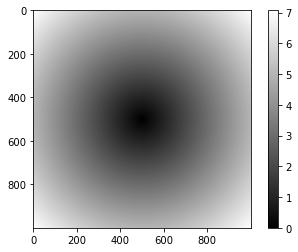

In [142]:
#visualization of the plot
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

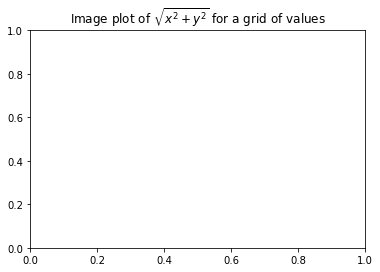

In [143]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [144]:
plt.show()

NOTE: looks like this since it is in range [-5, 5]. centered on zero

## Expressing Conditional Logic as Array Operations
the *numpy.where* function is a vectorized version of the ternary expression *x if cond else y*

In [145]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

#this done with a list comprehension
# this is slower than numpy.where and it will not work for multidimensional arrays
# result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

#for each corresponding element in the three values, return xarr if cond element is true, otherwise return yarr
result = np.where(cond, xarr, yarr)

In [146]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [147]:
myArr = np.random.randn(5, 5)

In [148]:
myArr

array([[-0.30018673, -0.70581467, -0.68362767,  0.36032717,  0.34015554],
       [-0.72793696,  0.17530148, -0.87420382,  2.23786797,  0.20998865],
       [ 1.62319009, -0.56645784, -0.13787702, -0.46738264, -0.54216903],
       [ 0.12848712, -0.63589774,  1.51207564, -0.2505218 , -0.57461491],
       [ 0.2959806 , -0.14937069, -0.91475889, -0.97965238,  0.1137061 ]])

where arguments don't need to be arrays, one or both can be scalars

In [149]:
np.where(myArr >= 0, myArr, 0)

array([[0.        , 0.        , 0.        , 0.36032717, 0.34015554],
       [0.        , 0.17530148, 0.        , 2.23786797, 0.20998865],
       [1.62319009, 0.        , 0.        , 0.        , 0.        ],
       [0.12848712, 0.        , 1.51207564, 0.        , 0.        ],
       [0.2959806 , 0.        , 0.        , 0.        , 0.1137061 ]])

## Mathematical and Statistical Methods
a set of mathematical functions taht compute tstatistics about an entire array, or about the data along an axis, are accessible as methods. 

*aggregations*, also known as *reductions*, such asL *sum*, *mean*, and *std* (standard deviation), can be called either by calling the array instance method or my using the top-level NumPy function.

In [150]:
arr = np.random.randn(5, 4)

In [151]:
arr

array([[ 1.66396895,  1.46600557,  0.03090659, -0.25486431],
       [ 0.8096312 ,  1.42564435, -0.25771342, -0.02759857],
       [-0.09510552,  0.03845483, -0.21213216,  0.01525165],
       [ 0.82645277, -0.29599029,  1.16287548, -2.14321804],
       [ 0.8561747 , -0.23983507,  1.47651333, -0.96566206]])

In [152]:
arr.mean()

0.26398799975199755

In [153]:
#equivalent function
np.mean(arr)

0.26398799975199755

In [154]:
arr.sum()

5.279759995039951

you can specify an optional axis, that computes the statistics for every set of elements along that axis

In [155]:
#mean across the columns (left right)
arr.mean(axis=1)

array([ 0.7265042 ,  0.48749089, -0.0633828 , -0.11247002,  0.28179773])

In [156]:
#axis across the rows (up down)
arr.mean(axis=0)

array([ 0.81222442,  0.47885588,  0.44008996, -0.67521827])

In [157]:
arr3D = np.random.randn(5, 5, 5)

In [158]:
#you can even pass a tuple of axes to perfrom statistics on
#order doesn't matter, i'm just an idiot
np.mean(arr3D, axis=(2, 0))

array([-0.16537386,  0.19451028,  0.14044683, -0.09350674,  0.191833  ])

some methods do not aggregate, instead, producing an array of intermediate values

In [159]:
arr = np.arange(8)

In [160]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [161]:
#cumulative sum
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [162]:
#cumulative product
(arr + 1).cumprod()

array([    1,     2,     6,    24,   120,   720,  5040, 40320],
      dtype=int32)

## Methods for Boolean Arrays
boolean values are coerced to 1 (True) and 0 (False) in the previous methods. thus, *sum* is often used to count the number of true values in a boolean array

In [163]:
arr = np.random.randn(100)

In [164]:
(arr > 0).sum()

49

two other methods, *any* and *all* test whether any values are true in the array, or all values are true in the array, respectively

In [165]:
bools = np.array([False, False, True, True])

In [166]:
bools.any()

True

In [167]:
bools.all()

False

## Sorting
like python, NumPy arrays can be sorted in place with *sort*

In [168]:
arr = np.random.randn(6)

In [169]:
arr

array([ 0.57321941,  1.4765344 ,  1.2178747 , -1.74636116, -0.31347046,
       -0.11478116])

In [170]:
arr.sort()

In [171]:
arr

array([-1.74636116, -0.31347046, -0.11478116,  0.57321941,  1.2178747 ,
        1.4765344 ])

you can sort each 1-dimensioal section of values in a multidimensional array by specifying an axis

In [172]:
arr = np.random.randn(5, 5)

In [173]:
arr

array([[-0.76479481,  0.63204146,  1.90791953,  2.04061213, -0.35378313],
       [ 0.48991868,  0.01868157, -1.57104651,  0.74112246, -0.83952013],
       [-1.97192172, -0.60761116,  0.50261542, -0.4885769 ,  0.69497155],
       [-0.62325695,  1.19099088, -0.57016144, -1.02759202,  0.27183108],
       [-0.11675785, -0.95142055, -0.64978314, -0.58467339, -0.54901386]])

In [174]:
#default axis is 0 (across rows)
arr.sort(axis=0)

In [175]:
arr

array([[-1.97192172, -0.95142055, -1.57104651, -1.02759202, -0.83952013],
       [-0.76479481, -0.60761116, -0.64978314, -0.58467339, -0.54901386],
       [-0.62325695,  0.01868157, -0.57016144, -0.4885769 , -0.35378313],
       [-0.11675785,  0.63204146,  0.50261542,  0.74112246,  0.27183108],
       [ 0.48991868,  1.19099088,  1.90791953,  2.04061213,  0.69497155]])

In [176]:
arr.sort(axis = 1)

In [177]:
arr

array([[-1.97192172, -1.57104651, -1.02759202, -0.95142055, -0.83952013],
       [-0.76479481, -0.64978314, -0.60761116, -0.58467339, -0.54901386],
       [-0.62325695, -0.57016144, -0.4885769 , -0.35378313,  0.01868157],
       [-0.11675785,  0.27183108,  0.50261542,  0.63204146,  0.74112246],
       [ 0.48991868,  0.69497155,  1.19099088,  1.90791953,  2.04061213]])

In [178]:
flat = arr.flatten()

flat.sort()

In [179]:
flat.reshape(5, 5).T

array([[-1.97192172, -0.76479481, -0.57016144,  0.01868157,  0.69497155],
       [-1.57104651, -0.64978314, -0.54901386,  0.27183108,  0.74112246],
       [-1.02759202, -0.62325695, -0.4885769 ,  0.48991868,  1.19099088],
       [-0.95142055, -0.60761116, -0.35378313,  0.50261542,  1.90791953],
       [-0.83952013, -0.58467339, -0.11675785,  0.63204146,  2.04061213]])

the top-level np.sort returns a sorted copy of an array instead of in-place.

a quick and dirty way to check quantiles is to sort it and see the value at a particular rank

In [180]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [181]:
large_arr[int(0.05 * len(large_arr))] # 5th quantile

-1.6270036821371587

In [182]:
np.quantile(large_arr, 0.05) # built in function for it

-1.6277586229044507

## Unique and Other Set Logic
NumPy has some basic set operations for one-dimensional ndarrays. a common one is *ndarray*

In [183]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [184]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [185]:
ints = np.array([3, 3, 2, 2, 1, 1, 4, 4])

In [186]:
np.unique(ints)

array([1, 2, 3, 4])

In [187]:
#a built in python way to do this would be
sorted(set(names))

['Bob', 'Joe', 'Will']

another function, *np.in1d* tests membership of the values in one array in another, returning a boolean array

In [188]:
#returns a boolean array of length ints, true if the elements are equal to one of the values contained in the second parameter
np.in1d(ints, [1, 3, 5])

array([ True,  True, False, False,  True,  True, False, False])

## File IO and Output with Arrays
NumPy is able to save and load data to and from disk, either in text or binary format. *np.save* and *np.load* are the two main functions for efficiently saving and loading array data on disk. arrays are saved by defalt in an uncompressed, raw binary format. with the file extension *.npy*

In [189]:
arr = (np.arange(25) + 1).reshape(5, 5)

In [190]:
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [191]:
#now a RAW datas structure, though the values themselves are raw. preserves shape, as well as most other ndarray properties
np.save('some_array', arr)

if a path doesn't end in *.npy* then it will be appended (above)

In [192]:
np.load('some_array.npy')

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

you can save multiple arrays in an uncompressed archive using *np.savez*, and passing the arrays as keyword arguments

In [193]:
np.savez('array_archive.npz', a=arr, b=arr)

if your data compresses well, then you may want to use *numpy.savez_compressed* instead:

In [194]:
np.savez('arrays_compressed.npz', a=arr, b=arr)

## Linear Algebra
linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of NumPy.

unlike languages such as MATLAB, the \* operator performs *element wise* multiplication instead of the dot product. to calculate the dot product, use *numpy.dot*

from Numpy.org:
* If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
* If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.
* If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

In [195]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1., 7.], [8., 9.]])

In [196]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [197]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [198]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

the @ symbol also works as an infix operator that performs matrix multiplication

In [199]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

*np.linalg* has a standard set of matrix decompositions and things like inverse and determinant. under the hood they are implemented by industry standard libraries like **BLAS**, **LAPACK**, or possibly Intel **MKL**.

In [200]:
from numpy.linalg import inv, qr

In [201]:
x = np.random.randn(5, 5)
mat = x.T.dot(x)

In [202]:
mat

array([[ 3.24777687,  4.2381959 , -0.17869687,  1.24183392,  0.02590422],
       [ 4.2381959 , 11.44106448, -0.8242099 , -2.31859777, -1.09550622],
       [-0.17869687, -0.8242099 ,  6.49742185, -0.27884506, -2.53519361],
       [ 1.24183392, -2.31859777, -0.27884506,  3.51532797,  0.4304137 ],
       [ 0.02590422, -1.09550622, -2.53519361,  0.4304137 ,  4.20604531]])

In [203]:
inv(mat)

array([[ 7.7934352 , -4.17690637, -1.01329706, -5.44279364, -1.18970689],
       [-4.17690637,  2.34612126,  0.57546052,  2.98558839,  0.67813241],
       [-1.01329706,  0.57546052,  0.34274114,  0.72943163,  0.288068  ],
       [-5.44279364,  2.98558839,  0.72943163,  4.13289751,  0.82788378],
       [-1.18970689,  0.67813241,  0.288068  ,  0.82788378,  0.51062035]])

In [204]:
#qr factorization of a matrix
q, r = qr(mat)

In [205]:
q

array([[-0.59212085,  0.3521939 , -0.05418659,  0.18730022, -0.69809369],
       [-0.77268983, -0.4933778 , -0.00676025, -0.03388569,  0.3979131 ],
       [ 0.03257925,  0.07591556, -0.92792781,  0.32179747,  0.16903193],
       [-0.22640587,  0.7697977 ,  0.02358373, -0.34584634,  0.48578389],
       [-0.00472275,  0.18489491,  0.36798356,  0.86058531,  0.29962073]])

In [206]:
r

array([[ -5.4849899 , -10.84665249,   1.02945513,   0.24923297,
          0.63124108],
       [  0.        ,  -6.20207563,   0.15356767,   4.34581501,
          1.46616896],
       [  0.        ,   0.        ,  -6.95336936,   0.44842136,
          3.91638518],
       [  0.        ,   0.        ,   0.        ,  -0.6239242 ,
          2.69695879],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.58677788]])

## Pseudorandom Number Generation
*numpy.random* suppliments pythons *random* with functions for efficiently generating entire arrays of sample values, from many kidns of distributions

In [207]:
#normal distribution
samples = np.random.normal(size=(4, 4))

In [208]:
samples

array([[-1.00202596, -0.00858151,  2.28535233, -1.65617687],
       [ 1.70028676, -1.20034678, -1.67761604,  0.12413548],
       [ 1.26758593, -0.82036237,  1.4432075 , -0.35165809],
       [ 1.2399525 , -0.03176116,  0.07958338, -0.17556085]])

you can change NumPys random number generations **Seed** using *np.random.seed(val)*

In [209]:
np.random.seed(1234)

the data generation algorithms in *numpy.random* use a global random seed. to Avoid global state, you can use *numpy.random.RandomState* to create a generator isolated from others

In [210]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])